![](image.jpg)


Dive into the heart of data science with a project that combines healthcare insights and predictive analytics. As a Data Scientist at a top Health Insurance company, you have the opportunity to predict customer healthcare costs using the power of machine learning. Your insights will help tailor services and guide customers in planning their healthcare expenses more effectively.

## Dataset Summary

Meet your primary tool: the `insurance.csv` dataset. Packed with information on health insurance customers, this dataset is your key to unlocking patterns in healthcare costs. Here's what you need to know about the data you'll be working with:

## insurance.csv
| Column    | Data Type | Description                                                      |
|-----------|-----------|------------------------------------------------------------------|
| `age`       | int       | Age of the primary beneficiary.                                  |
| `sex`       | object    | Gender of the insurance contractor (male or female).             |
| `bmi`       | float     | Body mass index, a key indicator of body fat based on height and weight. |
| `children`  | int       | Number of dependents covered by the insurance plan.              |
| `smoker`    | object    | Indicates whether the beneficiary smokes (yes or no).            |
| `region`    | object    | The beneficiary's residential area in the US, divided into four regions. |
| `charges`   | float     | Individual medical costs billed by health insurance.             |



A bit of data cleaning is key to ensure the dataset is ready for modeling. Once your model is built using the `insurance.csv` dataset, the next step is to apply it to the `validation_dataset.csv`. This new dataset, similar to your training data minus the `charges` column, tests your model's accuracy and real-world utility by predicting costs for new customers.

## Let's Get Started!

This project is your playground for applying data science in a meaningful way, offering insights that have real-world applications. Ready to explore the data and uncover insights that could revolutionize healthcare planning? Let's begin this exciting journey!

In [51]:
# Re-run this cell
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

# Loading the insurance dataset
insurance_data_path = 'insurance.csv'
insurance = pd.read_csv(insurance_data_path)
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.924
1,18.0,male,33.770,1.0,no,Southeast,1725.5523
2,28.0,male,33.000,3.0,no,southeast,$4449.462
3,33.0,male,22.705,0.0,no,northwest,$21984.47061
4,32.0,male,28.880,0.0,no,northwest,$3866.8552


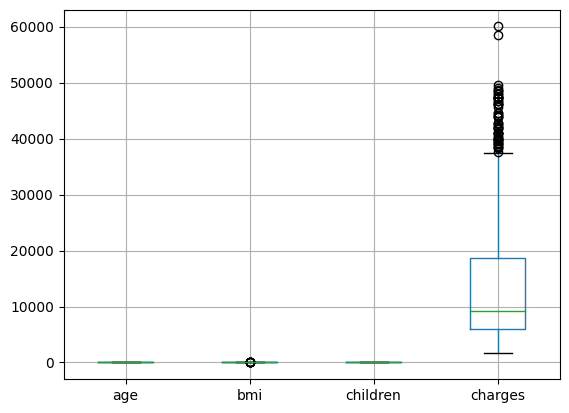

(613, 11) (613,)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       50 non-null     float64
 1   sex       50 non-null     object 
 2   bmi       50 non-null     float64
 3   children  50 non-null     float64
 4   smoker    50 non-null     object 
 5   region    50 non-null     object 
dtypes: float64(3), object(3)
memory usage: 2.5+ KB


In [52]:

insurance.describe()

#data cleaning

insurance=insurance[insurance["age"]>0]
insurance=insurance[insurance["children"]>0]
insurance.dropna(inplace=True)
insurance.isna().sum().sort_values()




# Remove the dollar sign from the 'charges' column and replace different values so that I do not have different values at the same column (prevent problems get dummies)
insurance['charges'] = insurance['charges'].str.replace('$', '')
insurance['sex'] = insurance['sex'].str.replace('F', 'female').str.replace('woman', 'female')
insurance['sex'] = insurance['sex'].str.replace('M', 'male').str.replace('man', 'male')

insurance['region'] = insurance['region'].str.replace('Southeast', 'southeast').str.replace('Northeast', 'northeast').str.replace('Northwest', 'northwest').str.replace('Southwest', 'southwest')
insurance['smoker'].unique()

# Convert the 'charges' column to numeric
insurance['charges'] = pd.to_numeric(insurance['charges'])

#plot the data to see if everything looks good
insurance.boxplot()
plt.show()

#categorically encode some columns
insurance=pd.get_dummies(insurance, columns=['sex',"smoker","region"])

#split the data
X = insurance.drop("charges", axis=1)
y = insurance["charges"].values
print(X.shape,y.shape) #make sure data is okey
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state=42)

#Standarize X

standard=StandardScaler()
X_trainScaled=standard.fit_transform(X_train)
X_testScaled=standard.transform(X_test)

#apply LogReg


model=LinearRegression()
model.fit(X_train,y_train)

X_train
#compute cross validation score (r2)
kf = KFold(n_splits=6, shuffle=True, random_state=5)
r2_score=cross_val_score(model,X,y,cv=kf,scoring='r2')
r2_score=np.mean(r2_score)


#read validation data

validation_data=pd.read_csv("validation_dataset.csv")
#validation_data=validation_data[validation_data["age"]>0]
#validation_data=validation_data[validation_data["children"]>0]
validation_data.info()
validation_data=pd.get_dummies(validation_data, columns=['sex',"smoker","region"])

validation_data["predicted_charges"]=model.predict(validation_data)

validation_data.loc[validation_data['predicted_charges'] < 0, 'predicted_charges'] = 1000